<a href="https://colab.research.google.com/github/sridhartroy/hello-world/blob/master/Sridhar_Srinivasan_PROJECT_7_Plant_Seedlings_Classification_CNN_Project_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal (Objective) of the Plant Seedlings Project


#### You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.


#### Data Dictionary:

The dataset can be download from Olympus.
The data file names are:
- images.npy
- Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels 
are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data 
volume.

#### Aim/Context:

Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stage


#### Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data 
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s 
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)


# 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset.

#### IMPORTING LIBRARIES

In [39]:
# fundamental libraries
import numpy as np
import pandas as pd

# plotting libraries&presentation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_profiling
#presentation
from IPython.display import Image  
import pydotplus as pydot

# model and metrics libraries for measuring performance
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, LabelBinarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score,roc_auc_score, precision_score, confusion_matrix, classification_report,precision_recall_curve,auc

# ANN/CNN libraries
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, preprocessing, callbacks, utils
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# warnings
import warnings
warnings.filterwarnings('ignore')


#### LOAD DATASETS, PRINT SHAPE OF THE DATASETS
##### First load the labels.csv and then load the images.npy

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Reads the the labels CSV file which was downloaded from the Olympus site.
labels_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML_Project7/Labels.csv')
labels_df

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [4]:
#labels_df.Label = 'Scentless Mayweed'

In [5]:
print("Shape of the Labels dataset is {}".format(labels_df.shape))

Shape of the Labels dataset is (4750, 1)


In [6]:
len(labels_df.Label.unique())
labels_df.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

##### Now, let's create a dictionary for the labels.

In [7]:
labels_dict = {0:labels_df.Label.unique()[0],
               1:labels_df.Label.unique()[1],
               2:labels_df.Label.unique()[2],
               3:labels_df.Label.unique()[3],
               4:labels_df.Label.unique()[4],
               5:labels_df.Label.unique()[5],
               6:labels_df.Label.unique()[6],
               7:labels_df.Label.unique()[7],
               8:labels_df.Label.unique()[8],
               9:labels_df.Label.unique()[9],
               10:labels_df.Label.unique()[10],
               11:labels_df.Label.unique()[11]
              }

In [8]:
labels_dict

{0: 'Small-flowered Cranesbill',
 1: 'Fat Hen',
 2: 'Shepherds Purse',
 3: 'Common wheat',
 4: 'Common Chickweed',
 5: 'Charlock',
 6: 'Cleavers',
 7: 'Scentless Mayweed',
 8: 'Sugar beet',
 9: 'Maize',
 10: 'Black-grass',
 11: 'Loose Silky-bent'}

In [9]:
# Read the npy file that has the images in numpyarray format
images = np.load('/content/drive/My Drive/Colab Notebooks/AIML_Project7/images.npy')

In [10]:
print("Shape of the Images dataset is {}".format(images.shape))

Shape of the Images dataset is (4750, 128, 128, 3)


In [11]:
print("Images dimension : {}". format(images.ndim))
print("Images shape : {}". format(images.shape))

Images dimension : 4
Images shape : (4750, 128, 128, 3)


In [12]:
len(images)

4750

#### VISUALIZE IMAGES IN DATASET

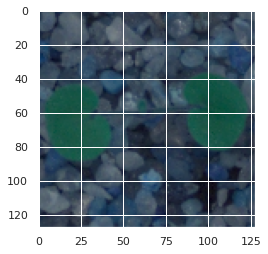

Image #0 is Small-flowered Cranesbill
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



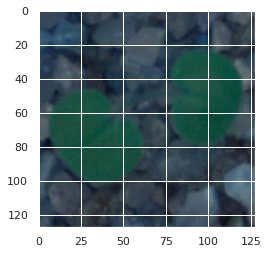

Image #475 is Small-flowered Cranesbill
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



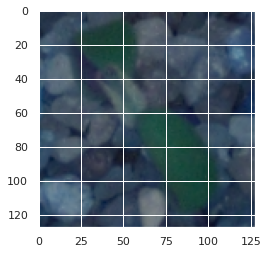

Image #950 is Fat Hen
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



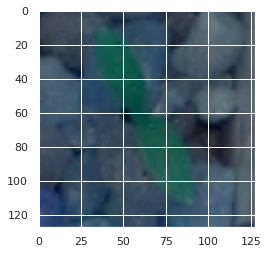

Image #1425 is Common Chickweed
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



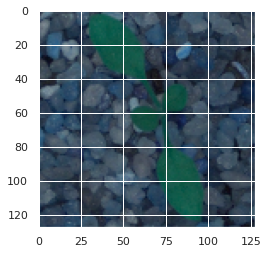

Image #1900 is Common Chickweed
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



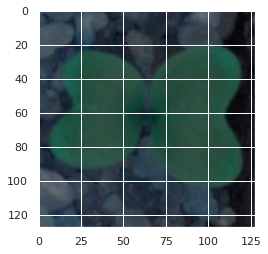

Image #2375 is Charlock
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



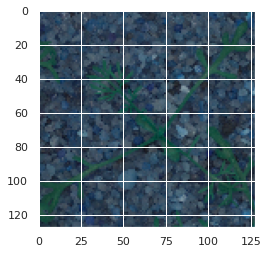

Image #2850 is Scentless Mayweed
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



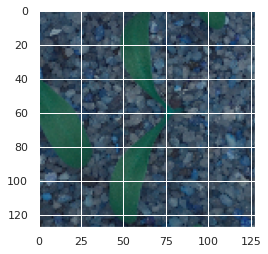

Image #3325 is Sugar beet
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



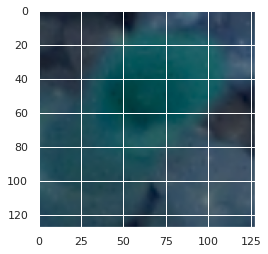

Image #3800 is Maize
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



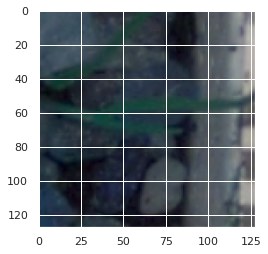

Image #4275 is Loose Silky-bent
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



In [13]:
for i in range(0,len(images),475):
  plt.imshow(images[i])
  plt.show()
  print("Image #{} is {}".format(i, labels_df['Label'][i]))
  print("Shape of the image is {}".format(images[i].shape))
  print("Height is {}, Width is {}".format(images[i].shape[0], images[i].shape[1]))
  print()
 # cv2_imshow(images[i]) # using open cv as well
  


#### Inference from the image dataset
- There are 4750 total images
- Image size is 128 x 128 pixels
- Each image has 3 color channels

# 2. Data Preprocessing



##### A. Normalization of Images & Categorizing the Labels

In [14]:
# Before normlaization
print('Before normalization : Min and Max values in the images : {} and {}'.format(images.min(), images.max()))

Before normalization : Min and Max values in the images : 0 and 255


In [15]:
# Normalize the images data. Before that, convert into Float32
images = images.astype('float32')
images = images / 255.0
print('After normalization : Min and Max values in the images : {} and {}'.format(images.min(), images.max()))

After normalization : Min and Max values in the images : 0.0 and 1.0


After normalization the images: 



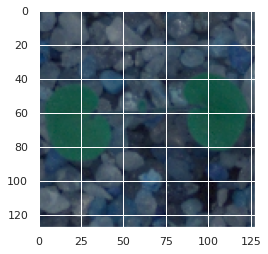

Image #0 is Small-flowered Cranesbill
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



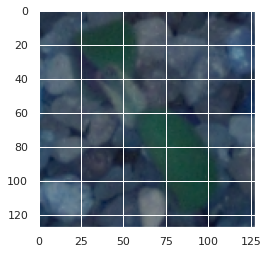

Image #950 is Fat Hen
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



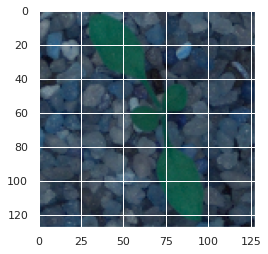

Image #1900 is Common Chickweed
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



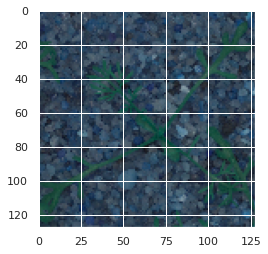

Image #2850 is Scentless Mayweed
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



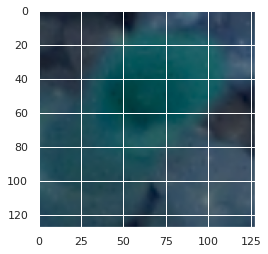

Image #3800 is Maize
Shape of the image is (128, 128, 3)
Height is 128, Width is 128



In [16]:
print("After normalization the images: \n")
for i in range(0,len(images),950):
  plt.imshow(images[i])
  plt.show()
  print("Image #{} is {}".format(i, labels_df['Label'][i]))
  print("Shape of the image is {}".format(images[i].shape))
  print("Height is {}, Width is {}".format(images[i].shape[0], images[i].shape[1]))
  print()

In [17]:
# We don't need to normlize the label data, but they are strings and we need to label encode first and then change to one hot vector
print("Before encoding: first 5 label values: \n{}". format(labels_df.Label[0:5]))
encoder = LabelEncoder() # Sklearn preprocessing
encoder.fit(labels_df.Label)
print()
print(encoder.classes_)
encodedLabels = encoder.transform(labels_df.Label)
print()
print("After encoding : first 5 label numeric values are : \n{}".format(encodedLabels[0:5]))

Before encoding: first 5 label values: 
0    Small-flowered Cranesbill
1    Small-flowered Cranesbill
2    Small-flowered Cranesbill
3    Small-flowered Cranesbill
4    Small-flowered Cranesbill
Name: Label, dtype: object

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

After encoding : first 5 label numeric values are : 
[10 10 10 10 10]


In [18]:
# Make labels categorical (one hot vector)
finalLabels = to_categorical(encodedLabels)
finalLabels # this is array of one hot vectors
print("Before coverting to one hot vector : first 5 label numeric values are : \n{}".format(encodedLabels[0:5]))
print()
print("After converting to one hot vector : first 5 labels are : \n{}".format(finalLabels[0:5]))

Before coverting to one hot vector : first 5 label numeric values are : 
[10 10 10 10 10]

After converting to one hot vector : first 5 labels are : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


##### B. Gaussian Blurring:

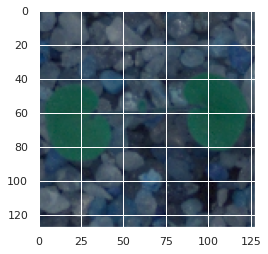

Image #0 is Small-flowered Cranesbill



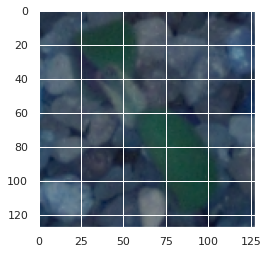

Image #950 is Fat Hen



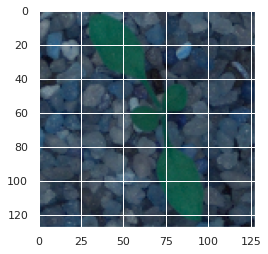

Image #1900 is Common Chickweed



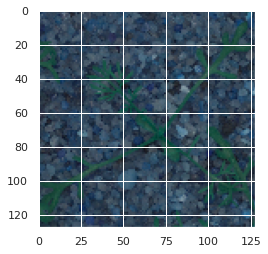

Image #2850 is Scentless Mayweed



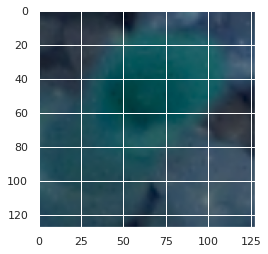

Image #3800 is Maize



In [19]:
# Before applying Gaussian Blurring sample 5 images:

for i in range(0,len(images),950):
  plt.imshow(images[i])
  plt.show()
  print("Image #{} is {}".format(i, labels_df['Label'][i]))
  print()

Before:



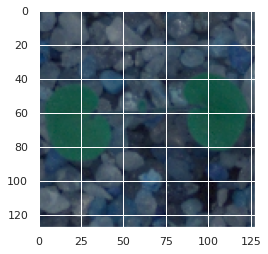

After:



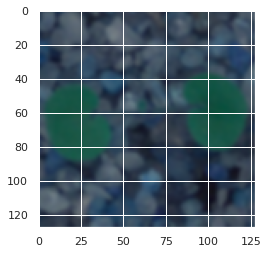

Image #0 is Small-flowered Cranesbill

Before:



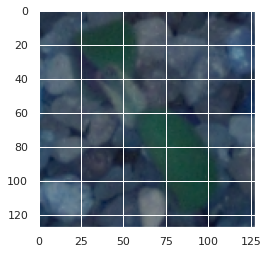

After:



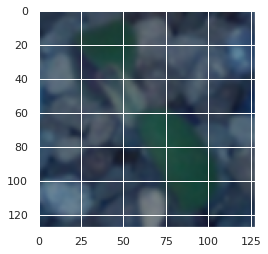

Image #950 is Fat Hen

Before:



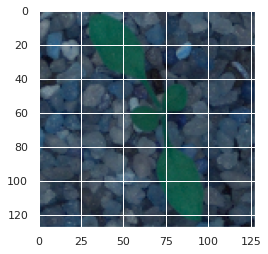

After:



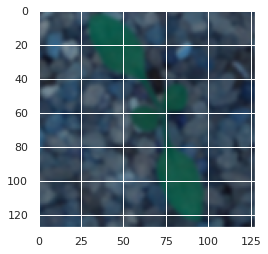

Image #1900 is Common Chickweed

Before:



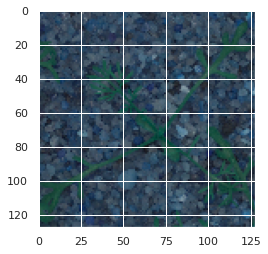

After:



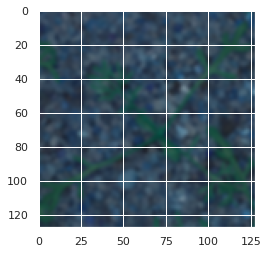

Image #2850 is Scentless Mayweed

Before:



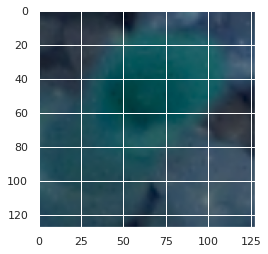

After:



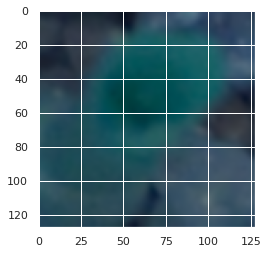

Image #3800 is Maize



In [20]:
# After applying a Gaussian Blur of kernel size (5,5)
for i in range(0,len(images),950):
  print("Before:\n") 
  plt.imshow(images[i])
  plt.show()
  Gaussian1=cv2.GaussianBlur(images[i], (5,5), 0)
  print("After:\n") 
  plt.imshow(Gaussian1)
  plt.show()
  print("Image #{} is {}".format(i, labels_df['Label'][i]))
  print()

##### C. Visualize data after pre-processing:

From the above we see for the sample 5 images, the (5,5) kernel-sized Gaussian Blur filter has smoothened(blurred) the image. Now, next step we need to apply this to all of the images and then sample few stores.

In [21]:
gaussianImages = []
#i=0
for image in images:
  gaussian=cv2.GaussianBlur(image, (5,5), 0)
  gaussianImages.append(gaussian)

0


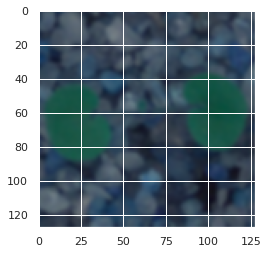

500


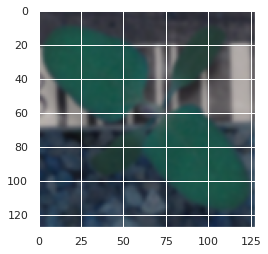

1000


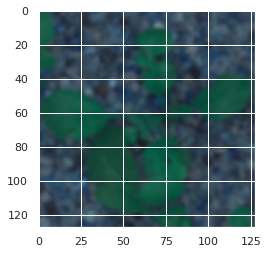

1500


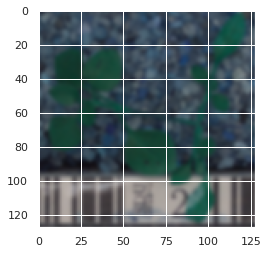

2000


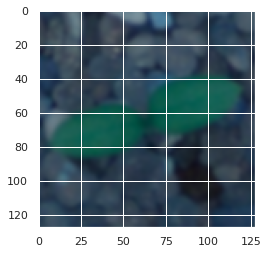

2500


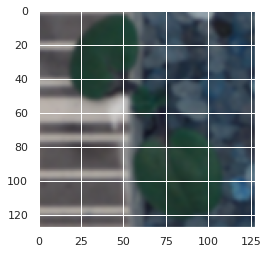

3000


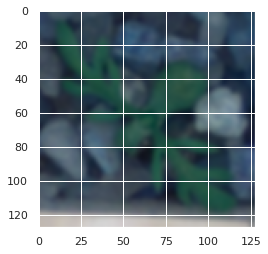

3500


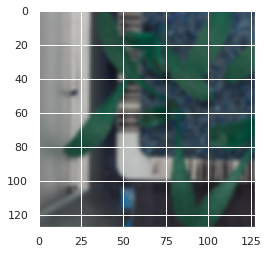

4000


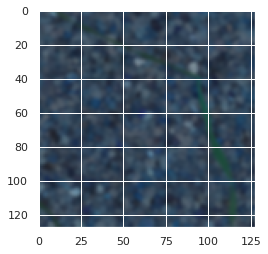

4500


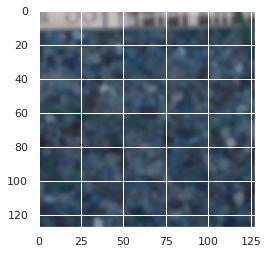

In [22]:
# After converting all the images to Gaussian and then displaying sample images.
for i in range(0, len(gaussianImages),500):
  print(i)
  plt.imshow(gaussianImages[i])
  plt.show()

# 3. Make Data Compatible

#### A. Convert Labels to one-hot vectors

In [23]:
# We don't need to normlize the label data, but they are strings and we need to label encode first and then change to one hot vector
print("Before encoding: first 5 label values: \n{}". format(labels_df.Label[0:5]))
encoder = LabelEncoder() # Sklearn preprocessing
encoder.fit(labels_df.Label)
print()
print(encoder.classes_)
encodedLabels = encoder.transform(labels_df.Label)
print()
print("After encoding : first 5 label numeric values are : \n{}".format(encodedLabels[0:5]))

Before encoding: first 5 label values: 
0    Small-flowered Cranesbill
1    Small-flowered Cranesbill
2    Small-flowered Cranesbill
3    Small-flowered Cranesbill
4    Small-flowered Cranesbill
Name: Label, dtype: object

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

After encoding : first 5 label numeric values are : 
[10 10 10 10 10]


In [24]:
# Make labels categorical (one hot vector)
finalLabels = to_categorical(encodedLabels)
finalLabels # this is array of one hot vectors
print("Before coverting to one hot vector : first 5 label numeric values are : \n{}".format(encodedLabels[0:5]))
print()
print("After converting to one hot vector : first 5 labels are : \n{}".format(finalLabels[0:5]))

Before coverting to one hot vector : first 5 label numeric values are : 
[10 10 10 10 10]

After converting to one hot vector : first 5 labels are : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


#### B. Split the dataset into training, testing, and validation sets. 
- (Image and label into training & testing with test_size=0.3, then further split test data into test and validation with test size=0.5)

In [25]:
gaussianImages
gaussianImagesArr=np.array(gaussianImages)
print(gaussianImagesArr.shape)
print(finalLabels.shape)


(4750, 128, 128, 3)
(4750, 12)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(gaussianImagesArr, finalLabels, test_size=0.3, random_state=12478)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=6579)

In [27]:
print("Training set shapes: ", X_train.shape, y_train.shape)
print("Validation set shapes: ", X_valid.shape, y_valid.shape)
print("Testing set shapes: ", X_test.shape, y_test.shape)

Training set shapes:  (3325, 128, 128, 3) (3325, 12)
Validation set shapes:  (712, 128, 128, 3) (712, 12)
Testing set shapes:  (713, 128, 128, 3) (713, 12)


#### C. Print the label for y_train[0]

In [28]:
print(encoder.classes_)
print()
print("The Label for the y_train[0] is : {}".format(encoder.classes_[list(y_train[0]).index(1)]))
print()
print("The y_train vector is : {}".format(y_train[0]))

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']

The Label for the y_train[0] is : Cleavers

The y_train vector is : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### D. Check the shape of the data. Is reshape required or not?

In [29]:
print("Training set shapes: ", X_train.shape, y_train.shape)
print("Validation set shapes: ", X_valid.shape, y_valid.shape)
print("Testing set shapes: ", X_test.shape, y_test.shape)

Training set shapes:  (3325, 128, 128, 3) (3325, 12)
Validation set shapes:  (712, 128, 128, 3) (712, 12)
Testing set shapes:  (713, 128, 128, 3) (713, 12)


#### From the above, reshape is not required as the input data is in the format (x, y, z, a) where:
- x is no. of samples
- y is height of the image
- z is width of the image
- a is the no. of channels. 

Our input images for train, test, and valid are in the same format as seen above. So, no need of reshaping.

In [30]:
# To see whether all are normalized or not. This was done earlier. Just double-confirming.
print('After normalization done in earlier steps : Min and Max values in the X_train : {} and {}'.format(X_train.min(), X_train.max()))
print('After normalization done in earlier steps : Min and Max values in the X_test : {} and {}'.format(X_test.min(), X_test.max()))
print('After normalization done in earlier steps : Min and Max values in the X_valid : {} and {}'.format(X_valid.min(), X_valid.max()))

After normalization done in earlier steps : Min and Max values in the X_train : 0.0 and 0.9998161792755127
After normalization done in earlier steps : Min and Max values in the X_test : 0.0 and 0.9978094696998596
After normalization done in earlier steps : Min and Max values in the X_valid : 0.0 and 0.9990349411964417


# 4. Building CNN

#### A. Define Layers

##### Steps for Model:
-Initialize model Keras **Sequential model**

-**Input image is of Input_shape** = (128, 128, 3)
- num_classes = 12 {For each seed sampling name}

-**Convolutional Layers**
  - 2 Conv Layers of num of filters 128 and kernel = 5x5. Rectifier activation function is ReLu. We will use padding to ensure we get all the image pixels.
  - 2 Conv Layers of num of filters 256 and kernel = 5x5. Rectifier activation function is ReLu. We will use padding to ensure we get all the image pixels.

-**Batch Normalization**
  - 1 between each Convolution Layer. So, 4 normalization functions
  - 1 between each Hidden Layer in Fully Connect layer. So, 2 normalization functions.

-**MaxPooling2D of Size 2X2**
  - After each set of Conv Layer - we will get the max pooling and send to next filter pair. So, 2 MaxPooling2D functions

-**Dropout Layer**
  - After each set of Conv Layer - we will use dropout. Dropout layer at 20%

-**GlobalMaxPooling2D** 
  - After convolution and before the Fully Connected Layer to further reduce the dimensionality of the feature map.

-**Flatten** before Fully Connect Layer

-**Fully Connected Layers**
  - 2 **Hidden** Layers of 512 and 256 respectively neurons with activation layer as ReLu.

  - **Dropout layer** at 30%
  
  - Finally, **output layer** in dense layer uses 12 classes for each samplings and use Softmax as activation function.

#### Model Creation Code

In [43]:
# clear session
from tensorflow.keras.backend import clear_session
clear_session()

In [44]:
X_train.shape[1:]

(128, 128, 3)

In [41]:
# Clear & Initialize the Covnet model
clear_session()
model = Sequential()

input=X_train.shape[1:]

# Add 2 Conv layers of 128 filters, 5X5. In between batchnormalization.
model.add(Conv2D(128, (5,5), padding='same', activation='relu', input_shape=input))
model.add(BatchNormalization(axis=3)) # normalize on the channels
model.add(Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3)) # normalize on the channels
# Bring in the MaxPooling Layer & Dropout before next set of 2 Conv Layers
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2)) # drop out rate of 20%
# Add 2 Conv layers of 256 filters, 5X5. In between batchnormalization.
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3)) # normalize on the channels
model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization(axis=3)) # normalize on the channels
# Bring in the MaxPooling Layer & Dropout before next set of layers
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2)) # drop out rate of 20%

# Bring in the Global Max Layer
model.add(GlobalMaxPooling2D()) # This is more like taking the maximum of the feature map

# Flatten
model.add(Flatten())

# Fully Connected Layer
# Hiddern Layer 1
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#Hiddern Layer 2
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(12, activation='softmax')) # 12 because there are 12 sampling names.

#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       8

#### Set Optimizer and Loss Function. (Use adam optimizer and categorical crossentropy)

In [45]:
# Initialize adam optimizer
optimizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name="Adam")

# Loss Function

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       8